## William Girard

## CIS 568 - Data Visualization

## Assignment 3

In [2]:
import pandas as pd
import networkx as nx

In [3]:
file_path = 'data/data_scopus.csv'
df = pd.read_csv(file_path)
df

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Propositional n-traces: visualizing a problem ...,1995,2-s2.0-0029533881,"As part of an inter-disciplinary effort, we ar...","IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Prevost Nathalie, Jorgenson Loki, Jennings R.E...",6603428086;55937115800;16412349600;7003348138;,"Prevost, Nathalie, Simon Fraser Univ, Burnaby,...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,NaN
566,Fast algorithms for visualizing fluid motion i...,1995,2-s2.0-0029487213,The plotting of streamlines is an effective wa...,"IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Ueng S.K., Sikorski K., Ma Kwan-Liu",7006871353;35194562700;35242602500;,"Ueng, S.K., Univ of Utah, Salt Lake City, Unit...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,10.0
567,Fast normal estimation using surface character...,1995,2-s2.0-0029488955,To visualize the volume data acquired from com...,"IEEE, Los Alamitos, CA, United States",Proceedings of the 1995 6th Annual IEEE Confer...,29 October 1995 through 3 October 1995,"Shin Byeong Seok, Shin Yeong Gil",7103027750;7402816561;,"Shin, Byeong Seok, Seoul Natl Univ, Seoul, Sou...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,4.0
568,Supporting heterogeneous data import for data ...,1995,2-s2.0-0029193549,Effective data visualization requires the comb...,"ACM, New York, NY, United States",Proceedings of the 1995 ACM Symposium on Appli...,26 February 1995 through 28 February 1995,"Ford R., Thompson R., Thompson D.",57214569671;8713633000;7404935132;,"Ford, R., Univ of Montana, Missoula, United St...",Proceedings of the ACM Symposium on Applied Co...,Proc ACM Symp Appl Computing,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      570 non-null    object 
 1   Year                       570 non-null    int64  
 2   EID                        570 non-null    object 
 3   Abstract                   570 non-null    object 
 4   Publisher                  345 non-null    object 
 5   Conference name            423 non-null    object 
 6   Conference date            423 non-null    object 
 7   Authors                    570 non-null    object 
 8   Author(s) ID               570 non-null    object 
 9   Authors with affiliations  561 non-null    object 
 10  Source title               570 non-null    object 
 11  Abbreviated Source Title   568 non-null    object 
 12  Cited by                   385 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 

In [5]:
# drop any rows that are missing year, affiliation, or author, per instructions

df_clean = df.dropna(axis=0, subset=['Year', 'Authors', 'Authors with affiliations']) # axis 0 means row, subset is a list of columns to check
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 569
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      561 non-null    object 
 1   Year                       561 non-null    int64  
 2   EID                        561 non-null    object 
 3   Abstract                   561 non-null    object 
 4   Publisher                  341 non-null    object 
 5   Conference name            414 non-null    object 
 6   Conference date            414 non-null    object 
 7   Authors                    561 non-null    object 
 8   Author(s) ID               561 non-null    object 
 9   Authors with affiliations  561 non-null    object 
 10  Source title               561 non-null    object 
 11  Abbreviated Source Title   559 non-null    object 
 12  Cited by                   385 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 61.4+

In [6]:
# list containing all countries, used to determine country related to affiliation

country_list = ['Afghanistan',
'Albania',
'Algeria',
'Andorra',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Australia',
'Austria',
'Azerbaijan',
'The Bahamas',
'Bahrain',
'Bangladesh',
'Barbados',
'Belarus',
'Belgium',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Brunei',
'Bulgaria',
'Burkina Faso',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Canada',
'Central African Republic',
'Chad',
'Chile',
'China',
'Colombia',
'Comoros',
'Congo, Democratic Republic of the',
'Congo, Republic of the',
'Costa Rica',
'Côte d’Ivoire',
'Croatia',
'Cuba',
'Cyprus',
'Czech Republic',
'Denmark',
'Djibouti',
'Dominica',
'Dominican Republic',
'East Timor (Timor-Leste)',
'Ecuador',
'Egypt',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Estonia',
'Eswatini',
'Ethiopia',
'Fiji',
'Finland',
'France',
'Gabon',
'The Gambia',
'Georgia',
'Germany',
'Ghana',
'Greece',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Honduras',
'Hungary',
'Hong Kong',
'Iceland',
'India',
'Indonesia',
'Iran',
'Iraq',
'Ireland',
'Israel',
'Italy',
'Jamaica',
'Japan',
'Jordan',
'Kazakhstan',
'Kenya',
'Kiribati',
'Kosovo',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Malta',
'Marshall Islands',
'Mauritania',
'Mauritius',
'Mexico',
'Micronesia, Federated States of',
'Moldova',
'Monaco',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Myanmar (Burma)',
'Namibia',
'Nauru',
'Nepal',
'Netherlands',
'New Zealand',
'Nicaragua',
'Niger',
'Nigeria',
'North Macedonia',
'Norway',
'Oman',
'Pakistan',
'Palau',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Poland',
'Portugal',
'Qatar',
'Romania',
'Russian Federation',
'Rwanda',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Samoa',
'San Marino',
'Sao Tome and Principe',
'Saudi Arabia',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Singapore',
'Slovakia',
'Slovenia',
'Solomon Islands',
'Somalia',
'South Africa',
'Spain',
'Sri Lanka',
'Sudan',
'Sudan, South',
'Suriname',
'Sweden',
'Switzerland',
'Syria',
'South Korea',
'Taiwan',
'Tajikistan',
'Tanzania',
'Thailand',
'Togo',
'Tonga',
'Trinidad and Tobago',
'Tunisia',
'Turkey',
'Turkmenistan',
'Tuvalu',
'Uganda',
'Ukraine',
'United Arab Emirates',
'United Kingdom',
'United States',
'Uruguay',
'Uzbekistan',
'Vanuatu',
'Vatican City',
'Venezuela',
'Vietnam',
'Yemen',
'Zambia',
'Zimbabwe']

In [7]:
nodes = []
author_list = []

for row in df.iterrows():
    data = row[1]
    if(',' in data['Authors']): # has authors
        author_ids = data['Author(s) ID'].split(';')[:-1]
        author_names = data['Authors'].split(',')
        affils = data['Authors with affiliations'].split(';')

        for i, author_id in enumerate(author_ids): # loop through all authors on this paper
            author_affil = affils[i]
            author_affil = author_affil.split(',')

            country = 0
            # check for mention of a country in the affiliations
            for affil in author_affil:
                affil = affil.strip()
                if(affil in country_list):
                    country=affil
                    break # exit loop
                else:
                    country= 'None' # no country listed
            
            # only add new authors
            if(author_id not in author_list):
                nodes.append((
                    author_id,
                    {
                        'Name': author_names[i].strip(),
                        'Country': country,
                    }
                ))

            author_list.append(author_id) # append to temporary list

print(nodes[0])
print(len(nodes))

('57202536919', {'Name': 'Zhang Y.', 'Country': 'Canada'})
1508


In [8]:
countries = []
for node in nodes:
    info = node[1]
    countries.append(info['Country'])

countries = pd.Series(countries)
countries.value_counts()

United States          416
Germany                136
China                   96
United Kingdom          77
South Korea             62
Brazil                  55
Japan                   54
Canada                  52
Russian Federation      50
Spain                   39
France                  38
Australia               31
Austria                 27
Italy                   27
Taiwan                  25
None                    24
Poland                  23
Sweden                  23
Czech Republic          22
Netherlands             20
Portugal                17
India                   17
Finland                 15
Greece                  15
Switzerland             13
Iran                    11
Norway                  10
Belgium                  9
Tunisia                  9
Romania                  8
Colombia                 8
Ireland                  7
Philippines              7
Mexico                   6
Thailand                 6
Malaysia                 5
Turkey                   5
L

In [9]:
G = nx.Graph()

In [10]:
G.add_nodes_from(nodes)

In [11]:
edges = []
for row in df.iterrows():
    data = row[1]
    authors = data['Author(s) ID']
    authors = authors.split(';')[:-1]
    i = 1
    for author in authors:
        if(i < len(authors)): # exclude last author
            current_author = author
            for author in authors[i:]:
                edge = (current_author, author)
                inverse_edge = (author, current_author)
                if((edge not in edges) and (inverse_edge not in edges)): # check for existing author connection
                    edges.append((current_author, author))
                else:
                    continue
            i+=1

In [12]:
G.add_edges_from(edges)

In [13]:
pos = nx.drawing.circular_layout(G)

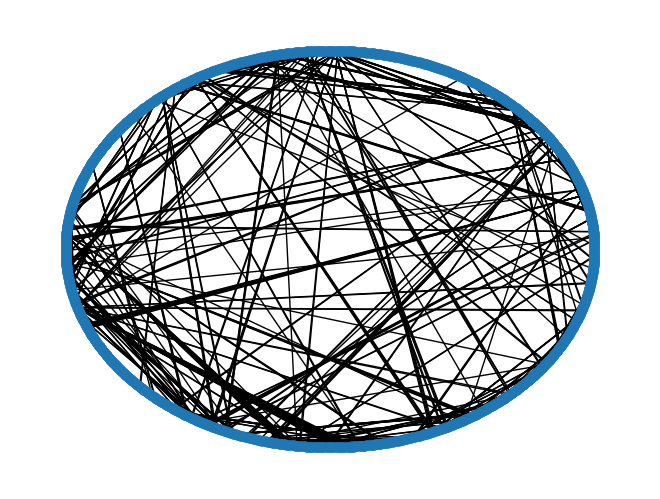

In [14]:
nx.draw(G, pos=pos, node_size=40)

In [15]:
from networkx.readwrite import json_graph
import json

In [16]:
with open('author_network.json', 'w') as f:
    json.dump(json_graph.node_link_data(G), f)

/home/wgirard/Documents/Fall-2025-Class/.venv/lib/python3.12/site-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(
